In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
os.chdir("C:\\Users\\Dinesh\\Desktop\\DataSets")

In [3]:
data=pd.read_csv("airquality.csv")

In [4]:
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [5]:
data.isna().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

In [6]:
from sklearn.preprocessing import Imputer

In [7]:
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)

In [8]:
features = np.array(data[['Ozone','Solar.R','Wind']])

In [9]:
target = np.array(data['Temp'])

In [10]:
imputer.fit(features[:,:])

Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)

In [11]:
features[:,[0,1]]=imputer.fit_transform(features[:,[0,1]])

In [12]:
df1=pd.DataFrame(features)

In [13]:
df1.head()

,0,1,2
0,41.00000,190.000000,7.4
1,36.00000,118.000000,8.0
2,12.00000,149.000000,12.6
3,18.00000,313.000000,11.5
4,42.12931,185.931507,14.3


In [14]:
data['Ozone']=df1[0]

In [15]:
data['Solar.R']=df1[1]

In [16]:
data.isna().sum()

Ozone      0
Solar.R    0
Wind       0
Temp       0
Month      0
Day        0
dtype: int64

In [17]:
data.head()

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.00000,190.000000,7.4,67,5,1
1,36.00000,118.000000,8.0,72,5,2
2,12.00000,149.000000,12.6,74,5,3
3,18.00000,313.000000,11.5,62,5,4
4,42.12931,185.931507,14.3,56,5,5


In [18]:
data.corr()

,Ozone,Solar.R,Wind,Temp,Month,Day
Ozone,1.000000,0.302970,-0.530936,0.608742,0.149081,0.004106
Solar.R,0.302970,1.000000,-0.055245,0.262569,-0.072904,-0.154340
Wind,-0.530936,-0.055245,1.000000,-0.457988,-0.178293,0.018440
Temp,0.608742,0.262569,-0.457988,1.000000,0.420947,-0.109867
Month,0.149081,-0.072904,-0.178293,0.420947,1.000000,-0.036411
Day,0.004106,-0.154340,0.018440,-0.109867,-0.036411,1.000000


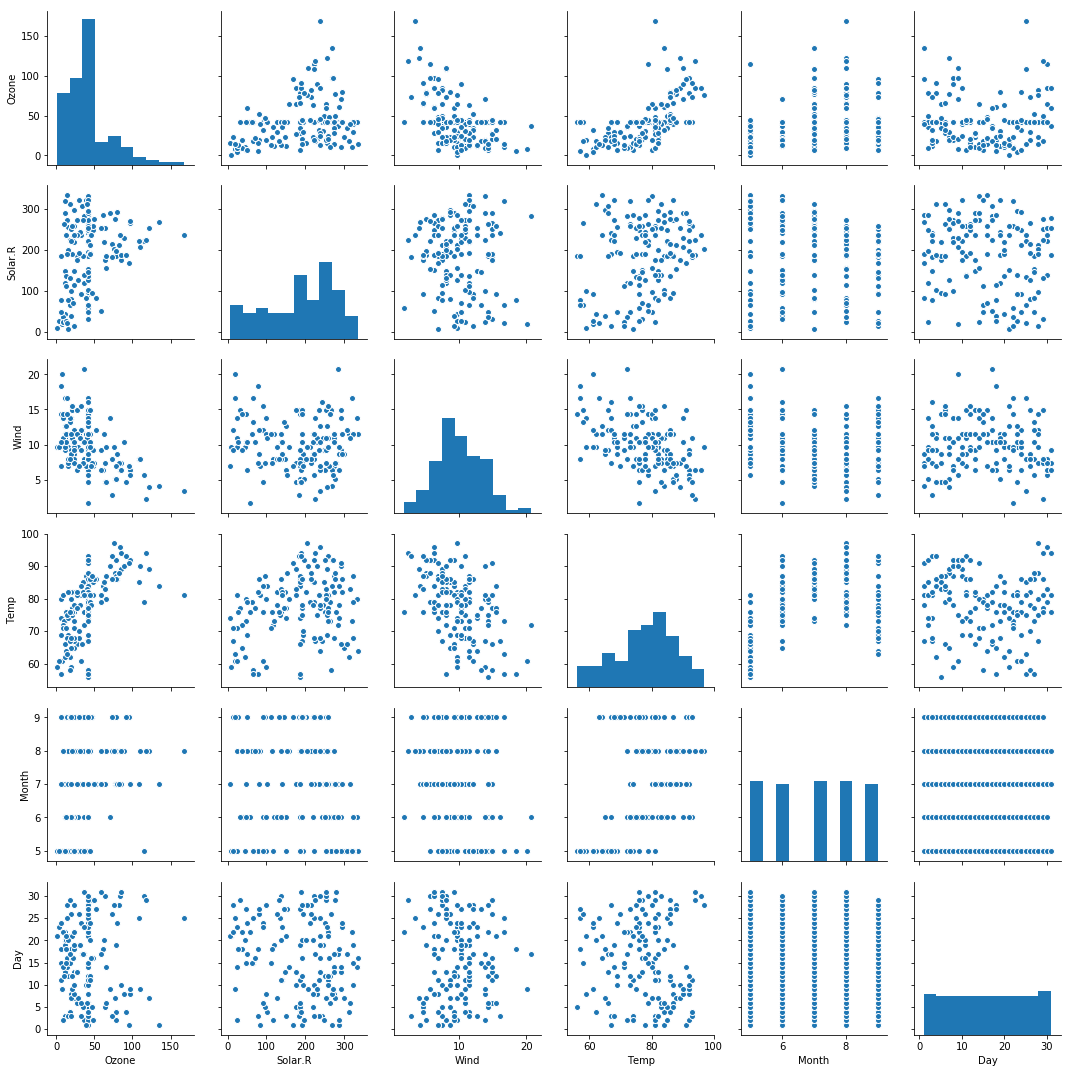

In [19]:
import seaborn as sns
sns.pairplot(data)

In [20]:
ozone=data['Ozone']

In [21]:
solar=data['Solar.R']

In [22]:
wind=data['Wind']

In [23]:
temp=data['Temp']

C:\Users\Dinesh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


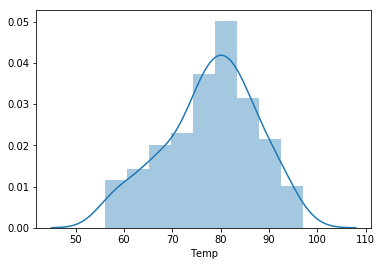

In [24]:
sns.distplot(temp)

C:\Users\Dinesh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


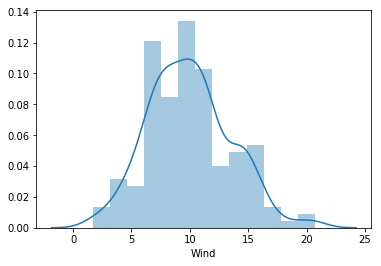

In [25]:
sns.distplot(wind)

C:\Users\Dinesh\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


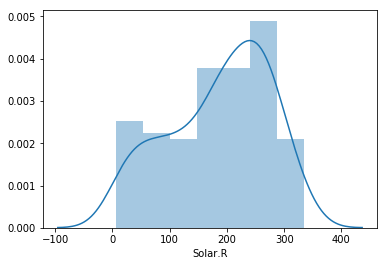

In [26]:
sns.distplot(solar)

In [27]:
import statsmodels.api as sm
model=sm.OLS(ozone,solar).fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     314.1
Date:                Wed, 15 May 2019   Prob (F-statistic):           8.09e-39
Time:                        23:31:13   Log-Likelihood:                -732.70
No. Observations:                 153   AIC:                             1467.
Df Residuals:                     152   BIC:                             1470.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Solar.R        0.2033      0.011     17.724      0.000       0.181       0.226
==============================================================================
Omnibus:                       17.298   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.801
Skew:                           0.729   Prob(JB):                     3.04e-05
Kurtosis:                       4.066   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
model=sm.OLS(ozone,wind).fit()

In [30]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.464
Model:                            OLS   Adj. R-squared:                  0.460
Method:                 Least Squares   F-statistic:                     131.5
Date:                Wed, 15 May 2019   Prob (F-statistic):           2.49e-22
Time:                        23:31:14   Log-Likelihood:                -770.73
No. Observations:                 153   AIC:                             1543.
Df Residuals:                     152   BIC:                             1546.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Wind           3.2847      0.286     11.469      0.000       2.719       3.851
==============================================================================
Omnibus:                       34.835   Durbin-Watson:                   0.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.202
Skew:                           1.169   Prob(JB):                     1.70e-12
Kurtosis:                       4.742   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model=sm.OLS(ozone,temp).fit()

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Ozone   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     441.5
Date:                Wed, 15 May 2019   Prob (F-statistic):           8.24e-47
Time:                        23:31:16   Log-Likelihood:                -714.23
No. Observations:                 153   AIC:                             1430.
Df Residuals:                     152   BIC:                             1433.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Temp           0.5598      0.027     21.011      0.000       0.507       0.612
==============================================================================
Omnibus:                       60.657   Durbin-Watson:                   1.221
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.386
Skew:                           1.637   Prob(JB):                     5.47e-36
Kurtosis:                       6.841   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
from sklearn.metrics import mean_squared_error,r2_score

# Solar and Ozone analysis with test size 20%

In [91]:
X_train,X_test,y_train,y_test= train_test_split(solar,ozone,test_size=0.2,random_state=1)

In [92]:
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
reg=LinearRegression()

In [95]:
solar_model=reg.fit(X_train,y_train)

In [96]:
solar_model.score(X_test,y_test)

-0.11919667565771097

In [97]:
solar_model.intercept_

22.377205916683128

In [98]:
solar_model.coef_

array([0.09098147])

In [99]:
y_train_predictions=solar_model.predict(X_train)

In [100]:
y_test_predictions =solar_model.predict(X_test)

In [101]:
np.sqrt(mean_squared_error(y_test_predictions,y_test))

29.4641162079041

In [102]:
np.sqrt(mean_squared_error(y_train_predictions,y_train))

26.864382240023577

In [103]:
r2_score(y_test_predictions,y_test)

-12.040933603476859

In [104]:
r2_score(y_train_predictions,y_train)

-10.500163717223435

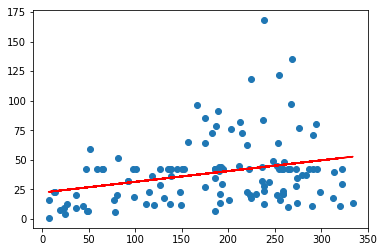

In [105]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_train_predictions,color='r')

# Wind and Ozone analaysis with test size 20%

In [51]:
X_train,X_test,y_train,y_test= train_test_split(wind,ozone,test_size=0.2,random_state=1)

In [52]:
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

In [53]:
wind_model=reg.fit(X_train,y_train)

In [54]:
wind_model.score(X_test,y_test)

0.15343640507042178

In [55]:
wind_model.intercept_

80.68697139214255

In [56]:
wind_model.coef_

array([-4.11159852])

In [57]:
y_test_predictions=wind_model.predict(X_test)

In [58]:
y_train_predictions=wind_model.predict(X_train)

In [59]:
np.sqrt(mean_squared_error(y_test_predictions,y_test))

25.625361879831992

In [60]:
np.sqrt(mean_squared_error(y_train_predictions,y_train))

24.03281810701312

In [61]:
r2_score(y_test_predictions,y_test)

-2.165653432976286

In [62]:
r2_score(y_train_predictions,y_train)

-1.7919248995666113

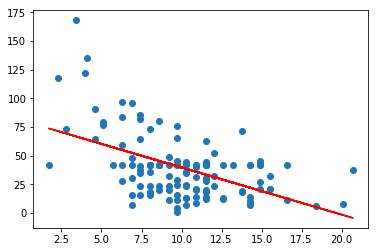

In [64]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_train_predictions,color='r')

# Temperature and Ozone analysis with test size 20%

In [65]:
X_train,X_test,y_train,y_test= train_test_split(temp,ozone,test_size=0.2,random_state=1)

In [66]:
X_train=X_train.values.reshape(-1,1)
X_test=X_test.values.reshape(-1,1)

In [67]:
temp_model=reg.fit(X_train,y_train)

In [68]:
temp_model.score(X_test,y_test)

0.270853384280051

In [69]:
temp_model.intercept_

-98.01169430714751

In [70]:
temp_model.coef_

array([1.77830241])

In [71]:
y_test_predictions=temp_model.predict(X_test)

In [72]:
y_train_predictions=temp_model.predict(X_train)

In [73]:
np.sqrt(mean_squared_error(y_test_predictions,y_test))

23.781960046859183

In [74]:
np.sqrt(mean_squared_error(y_train_predictions,y_train))

22.49047768991867

In [75]:
r2_score(y_test_predictions,y_test)

-1.1988193722968483

In [76]:
r2_score(y_train_predictions,y_train)

-0.8153969438962376

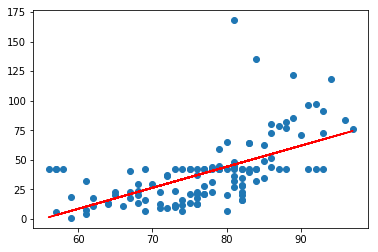

In [77]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_train_predictions,color='r')

# MultiLinear Regression with temp,wind,solar features with test size 20%

In [78]:
x=np.array(data[['Temp','Wind','Solar.R']])

In [79]:
y=np.array(data['Ozone'])

In [80]:
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.3,random_state=1)

In [81]:
model=reg.fit(X_train,y_train)

In [82]:
model.score(X_test,y_test)

0.5142187226375055

In [83]:
predictions=model.predict(X_test)

In [84]:
predictions

array([ 15.48801966,  13.2038747 ,  74.56595271,  52.97538912,
        50.63570065,  31.38467011,  66.71275127,   0.41297253,
        48.11510442,  40.55783275,  -6.4565547 ,  52.62025545,
        64.28907436,  42.37855949,  12.13027399,  56.69861073,
        27.99832406,  61.54430733,  62.78981672,  58.81996956,
        50.42162318,  71.74672745,  46.72028052,  56.15768918,
        22.93629788,  54.88757925,  56.44117342,  62.98513811,
        52.83978244,  70.0159209 ,  54.76037998,  14.02835504,
        11.72665144,  45.7331759 ,  49.58783931,  40.18946386,
        33.01392948,  75.33321316,  42.69306125,  33.62474632,
        47.90479688,  41.3877626 ,  51.43662567, -15.17061623,
        64.4773412 ,  73.88580997])

In [85]:
y_test

array([ 42.12931034,  42.12931034,  97.        ,  47.        ,
        42.12931034,  22.        ,  66.        ,  18.        ,
        42.12931034,  42.12931034,  14.        ,  46.        ,
        61.        ,  42.12931034,  28.        , 108.        ,
        34.        , 110.        ,  50.        ,  78.        ,
        59.        ,  78.        ,  39.        ,  89.        ,
         9.        ,  39.        , 115.        ,  42.12931034,
        42.12931034,  85.        ,  42.12931034,  11.        ,
         9.        ,  44.        ,  35.        ,  36.        ,
        42.12931034,  84.        ,  42.12931034,  45.        ,
        42.12931034,  23.        ,  40.        ,   6.        ,
        76.        ,  91.        ])

In [86]:
y_train_prediction = model.predict(X_train)

In [87]:
y_test_prediction = model.predict(X_test)

In [88]:
np.sqrt(mean_squared_error(y_pred=y_train_prediction,y_true=y_train))

21.34776456601803

In [89]:
r2_score(y_pred=y_train_prediction,y_true=y_train)

0.43598190444244833

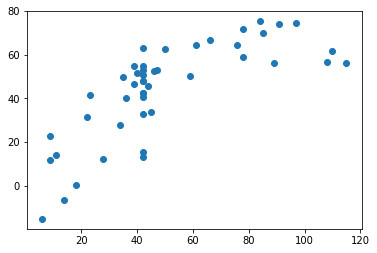

In [90]:
plt.scatter(y_test,predictions)